In [2]:
import torch

represent data in all sort of dimension
--> most common is the 3d dimensional representation
--> others like pictures and others forms are all possible
--> they are all sorts of possibility

In [ ]:
rand_1 = torch.rand(6,3,4)  # 3 by 4 by 6 of six sets
rand_2 = torch.rand(size=(3,224,224)) # 224 by 244 of 3 sets 3 dimension

In [ ]:
tensor = torch.arange(1,28).view(3,3,3)
tensor_1 = tensor.reshape(3,3,3)
tensor_1

Reshape:
    Can handle tensors that are not contiguous (but might need to copy the data in such cases).
    Changes the dimensions of the tensor.
    If possible, it returns a view (no data copy), otherwise it returns a new tensor (data copy).

View:
    Requires the tensor to be contiguous.
    Directly changes the dimensions without copying the data.
    Very efficient as it only changes the metadata describing the dimensions.

Tensor of Range
tensor of all zeros and ones



In [3]:
range_1 = torch.arange(1,11,2)
zeros_1 = torch.zeros(3,3)
ones_1 = torch.ones(3,3)
# specify from the torch designated dtypes to use 
tens_1 = torch.rand(size=(3,3),dtype=torch.float16,requires_grad=False)

useful tips 
tensor.dtype --> get datatype from tensore
tensor.shape --> get shape of tensor
tensor.device --> get device in which tensor is used

In [4]:
r_1 = torch.rand(3,10)
r_2 = torch.rand(3,10)
r_2.T.shape
print(r_1 * r_2)
torch.matmul(torch.rand(10,3),torch.rand(3,10))


tensor([[0.0253, 0.0625, 0.0319, 0.1233, 0.0713, 0.3016, 0.0417, 0.0380, 0.0496,
         0.1530],
        [0.0326, 0.5286, 0.6505, 0.2065, 0.0480, 0.0807, 0.4508, 0.2406, 0.4108,
         0.0325],
        [0.0302, 0.2925, 0.4848, 0.0172, 0.0106, 0.0277, 0.0779, 0.1982, 0.2242,
         0.5598]])


tensor([[1.3165, 1.0379, 0.6942, 0.7870, 0.3330, 0.8704, 0.7368, 0.9970, 0.8166,
         0.6515],
        [0.8649, 0.6891, 0.3332, 0.8187, 0.7347, 0.6362, 0.4130, 0.8394, 0.7788,
         0.3105],
        [0.8302, 0.7046, 0.2906, 0.8354, 0.6133, 0.6466, 0.4303, 0.7295, 0.8883,
         0.4677],
        [1.4647, 1.2769, 0.5144, 1.4512, 0.8986, 1.1566, 0.8017, 1.1859, 1.6317,
         0.9886],
        [1.3460, 1.2107, 0.4131, 1.4617, 0.9009, 1.1109, 0.7437, 1.0813, 1.6847,
         1.0125],
        [1.3841, 1.0983, 0.6824, 0.9416, 0.5269, 0.9421, 0.7525, 1.1068, 0.9609,
         0.6603],
        [1.0583, 0.8648, 0.5171, 0.7178, 0.2935, 0.7351, 0.6031, 0.7812, 0.7934,
         0.6187],
        [0.7251, 0.5831, 0.2889, 0.6597, 0.5449, 0.5313, 0.3591, 0.6721, 0.6461,
         0.2980],
        [0.5734, 0.4543, 0.2231, 0.5387, 0.4902, 0.4194, 0.2722, 0.5601, 0.5072,
         0.1966],
        [0.5693, 0.5380, 0.0455, 0.9255, 0.8284, 0.5466, 0.2623, 0.5980, 1.0041,
         0.3922]])

building model

In [5]:

from torch import nn
print(dir(nn))
import matplotlib.pyplot as plt
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

['AdaptiveAvgPool1d', 'AdaptiveAvgPool2d', 'AdaptiveAvgPool3d', 'AdaptiveLogSoftmaxWithLoss', 'AdaptiveMaxPool1d', 'AdaptiveMaxPool2d', 'AdaptiveMaxPool3d', 'AlphaDropout', 'AvgPool1d', 'AvgPool2d', 'AvgPool3d', 'BCELoss', 'BCEWithLogitsLoss', 'BatchNorm1d', 'BatchNorm2d', 'BatchNorm3d', 'Bilinear', 'CELU', 'CTCLoss', 'ChannelShuffle', 'CircularPad1d', 'CircularPad2d', 'CircularPad3d', 'ConstantPad1d', 'ConstantPad2d', 'ConstantPad3d', 'Container', 'Conv1d', 'Conv2d', 'Conv3d', 'ConvTranspose1d', 'ConvTranspose2d', 'ConvTranspose3d', 'CosineEmbeddingLoss', 'CosineSimilarity', 'CrossEntropyLoss', 'CrossMapLRN2d', 'DataParallel', 'Dropout', 'Dropout1d', 'Dropout2d', 'Dropout3d', 'ELU', 'Embedding', 'EmbeddingBag', 'FeatureAlphaDropout', 'Flatten', 'Fold', 'FractionalMaxPool2d', 'FractionalMaxPool3d', 'GELU', 'GLU', 'GRU', 'GRUCell', 'GaussianNLLLoss', 'GroupNorm', 'Hardshrink', 'Hardsigmoid', 'Hardswish', 'Hardtanh', 'HingeEmbeddingLoss', 'HuberLoss', 'Identity', 'InstanceNorm1d', 'Insta

In [6]:
#creating training and testing data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [7]:

def plot_predictions( train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(6,6))
    # plot training data in blue 
    plt.scatter(train_data,train_labels,c="b",s=4,label="training data")
    # plot test data in green
    plt.scatter(test_data,test_labels,c="g",s=4,label="testing data")
    if predictions is not None:
        # plot predictions in red
        plt.scatter(test_data,predictions,c="r",s=4,label="testing data")
    #show the legends
    plt.legend(prop={"size":13})    

    

In [8]:
# creating a linearRegression model class
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))    
    # defining computation in the model
    def forward(self,x: torch.Tensor) -> torch.tensor: 
        return self.weights * x + self.bias

In [9]:
# random seed
torch.manual_seed(42)
Model_0 = LinearRegressionModel() 
#list(Model_0.parameters())
#Model_0.state_dict()


In [10]:
### making prediction with torch.inference
with torch.inference_mode():
    y_preds = Model_0(X_test)

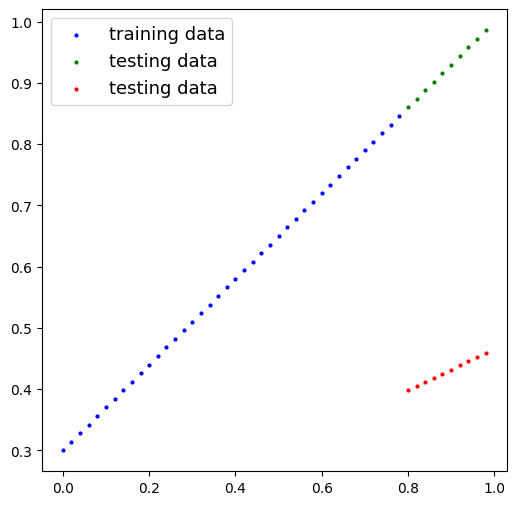

In [11]:
plot_predictions(predictions=y_preds)

In [12]:
# prediction made without actual data training
y_pred = Model_0(X_test)
print(f"""{X_test}----------{y_pred}""")

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])----------tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)


In [13]:
# setting up loss and optimizer function
loss_fcn = nn.L1Loss()
optimizer = torch.optim.SGD(params=Model_0.parameters(),
                         lr=0.01)

### building a training loop ####
within the training loop:
- loop through data
- forward pass--> (moving data using forward fcn) make predictions on data (forward   propagation)
- calculate loss 
- optimizer zero grad
- loss backward --> (moving backward through the network to calculate gradient of each parameter within the model to loss)
- use optimizer to adjust model -->  ("Gradient Descent")

In [20]:
epoch = 100

# training loop
for epoch in range(epoch):
    # model in training mode
   Model_0.train() # train mode in pytorch sets all parameters that requires gradient
   # 1. Forward pass
   y_pred = Model_0(X_train)
   # 2. loss fcn calcultaion
   loss = loss_fcn(y_pred,y_train)
   # 3. optimizer zero grad 
   optimizer.zero_grad()
   # 4. perform backward propagation on the loss with respect to the parameters of the model
   loss.backward() 
   #5  i.e how the changes in the optimizer will accumulate through the loop
       # they have to b ezero above step three 
   optimizer.step()
   
   ###-------------------------------------Testing------------------------------------###
   
   # test should occur foe each epoch
   Model_0.eval() # turn off settings not necessary for evaluation
   with torch.inference_mode():
        # 1. test prediction
        test_pred = Model_0(X_test)
        # 2. claculate the loss 
        test_loss = loss_fcn(test_pred,y_test)
   
   print(f"loss:{loss} ")     
   if epoch % 10 == 0:
        print(f"Epoch:{epoch} | loss:{loss} | Test loss:{test_loss}")
    

loss:0.008932482451200485 
Epoch:0 | loss:0.008932482451200485 | Test loss:0.005023092031478882
loss:0.0025885067880153656 
loss:0.008932482451200485 
loss:0.0025885067880153656 
loss:0.008932482451200485 
loss:0.0025885067880153656 
loss:0.008932482451200485 
loss:0.0025885067880153656 
loss:0.008932482451200485 
loss:0.0025885067880153656 
loss:0.008932482451200485 
Epoch:10 | loss:0.008932482451200485 | Test loss:0.005023092031478882
loss:0.0025885067880153656 
loss:0.008932482451200485 
loss:0.0025885067880153656 
loss:0.008932482451200485 
loss:0.0025885067880153656 
loss:0.008932482451200485 
loss:0.0025885067880153656 
loss:0.008932482451200485 
loss:0.0025885067880153656 
loss:0.008932482451200485 
Epoch:20 | loss:0.008932482451200485 | Test loss:0.005023092031478882
loss:0.0025885067880153656 
loss:0.008932482451200485 
loss:0.0025885067880153656 
loss:0.008932482451200485 
loss:0.0025885067880153656 
loss:0.008932482451200485 
loss:0.0025885067880153656 
loss:0.00893248245120

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

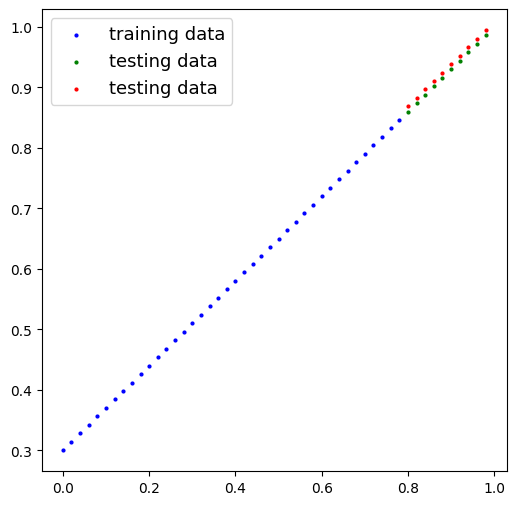

In [21]:
with torch.inference_mode():
    y_preds_new = Model_0(X_test)

plot_predictions(predictions=y_preds_new)
Model_0.state_dict()
